In [1]:
# Naive Bayes on my Data

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Some preliminary data wrangling!

with open("data/climate_change.json", "r") as f:
    data = json.load(f)
# for the subreddit 'climatechange' get all the comments and put them a vectorized dataframe
for i in range(len(data)):
    if data[i]['subreddit'] == 'climatechange':
        print(len(data[i]['comments']))

# create a dataframe with the comments
df_climate_change_subreddit = pd.DataFrame(data[0]['comments'])

# Label the data as climate change
df_climate_change_subreddit['label'] = 'climatechange'


# get data from the conservative subreddit

with open("data/climate_change.json", "r") as f:
    data = json.load(f)
# for the subreddit 'climatechange' get all the comments and put them a vectorized dataframe
for i in range(len(data)):
    if data[i]['subreddit'] == 'Conservative':
        print(len(data[i]['comments']))

# create a dataframe with the comments
df_conservative_subreddit = pd.DataFrame(data[0]['comments'])

# Label the data as climate change
df_conservative_subreddit['label'] = 'conservative'

# Concatenate the two dataframes

df = pd.concat([df_climate_change_subreddit, df_conservative_subreddit], ignore_index=True)
#Rename the columns
df.rename(columns={0: 'body'}, inplace=True)

df.to_csv("data/climate_change_and_conservative_subreddit_comments.csv", index=False)
df.columns

100
100
100
100
100
100
100
100


Index(['body', 'label'], dtype='object')

In [3]:
## Vectorize the data
dataframe = pd.read_csv("data/climate_change_and_conservative_subreddit_comments.csv")
df = dataframe[['body', 'label']]
# Lemmatize the data

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the NLTK data files
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Define a function to lemmatize the text
def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the lemmatized tokens back into a string
    return ' '.join(lemmatized_tokens)
# Apply the lemmatization function to the text column
df['body'] = df['body'].apply(lemmatize_text)
# Remove any rows with missing values
df.dropna(inplace=True)

# Create a count vectorizer
count_vectorizer = CountVectorizer(
    stop_words='english',
    lowercase=True,
    # Use a regex pattern to remove numbers and words less than 3 characters
    # This will remove any words that are not alphanumeric or less than 3 characters


    token_pattern=r'\b[a-zA-Z]{3,}\b',
    max_features=1000,  # Limit the number of features
    ngram_range=(1, 2)

  #  ngram_range=(1, 2)  # Use unigrams and bigrams
    
)
# Fit the vectorizer to the data
X = count_vectorizer.fit_transform(df['body'])
# Convert the sparse matrix to a dataframe

# Convert the sparse matrix to a dense array
X_dense = X.toarray()

# Create a DataFrame from the dense array
X_df = pd.DataFrame(X_dense, columns=count_vectorizer.get_feature_names_out())

# Add the label column to the DataFrame
X_df['label'] = df['label'].values

X_df.to_csv("data/climate_change_and_conservative_subreddit_comments_vectorized.csv", index=False)
# Now we can use the vectorized data to train a Naive Bayes classifier

In [ ]:
data = pd.read_csv("data/climate_change_and_conservative_subreddit_comments_vectorized.csv")
data

,able,abruptly,accelerating,according,account,accurate,actually,adapt,add,affordable,...,year today,year uptic,year worry,yec,yec graph,yes,yes doe,yes earth,yes man,label
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,climatechange
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative


Accuracy: 0.15
               precision    recall  f1-score   support

climatechange       0.12      0.10      0.11        31
 conservative       0.18      0.21      0.19        29

     accuracy                           0.15        60
    macro avg       0.15      0.15      0.15        60
 weighted avg       0.14      0.15      0.15        60

Confusion Matrix:
[[ 3 28]
 [23  6]]


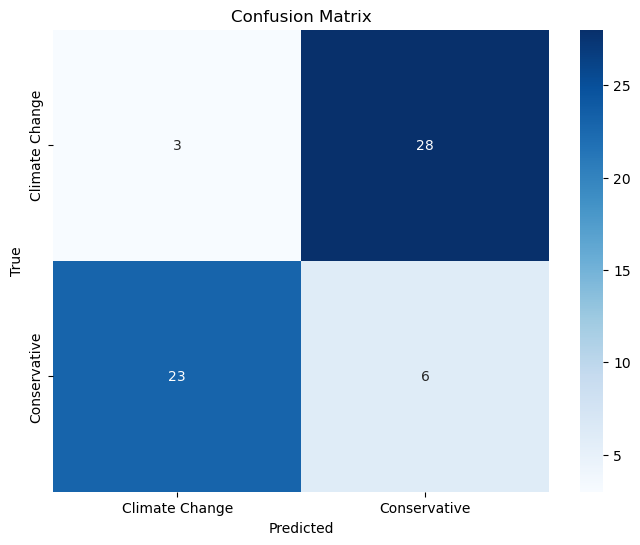

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_29013/1123068869.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')


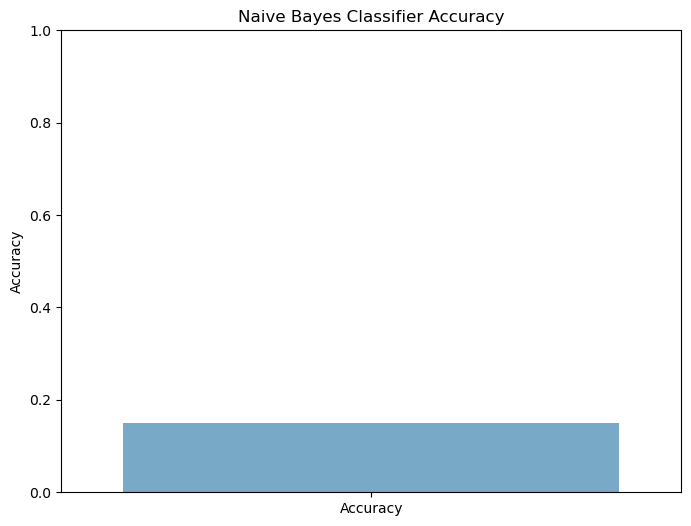

Top 50 features:
['000' '000 years' '100' '100 000' '100 200' '100 years' '1000'
 '1000 years' '200' '350' '350 million' '500' '500 million' '70' 'able'
 'abruptly' 'accelerating' 'according' 'account' 'accurate' 'actually'
 'adapt' 'affordable' 'age' 'agenda' 'agenda driven' 'ago' 'ago times'
 'agree' 'air' 'aren' 'arguing' 'article' 'atmosphere' 'attempt'
 'attention' 'average' 'bad' 'based' 'basic' 'basic physics' 'believe'
 'believe climate' 'believes' 'best' 'better' 'big' 'bigger' 'biggest'
 'billions']


In [ ]:
# Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB(
    alpha=1.0,  # Laplace smoothing parameter
    fit_prior=True,  # Whether to learn class prior probabilities
    class_prior=None  # Class prior probab  ilities (if not provided, they are learned from the data)
)
# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
# Plot the confusion matrix

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Climate Change', 'Conservative'], yticklabels=['Climate Change', 'Conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy')
plt.show()
print("Top 50 features:")
print(vectorizer.get_feature_names_out()[:50])


Accuracy: 0.12
               precision    recall  f1-score   support

climatechange       0.08      0.06      0.07        31
 conservative       0.15      0.17      0.16        29

     accuracy                           0.12        60
    macro avg       0.11      0.12      0.11        60
 weighted avg       0.11      0.12      0.11        60

Confusion Matrix:
[[ 2 29]
 [24  5]]


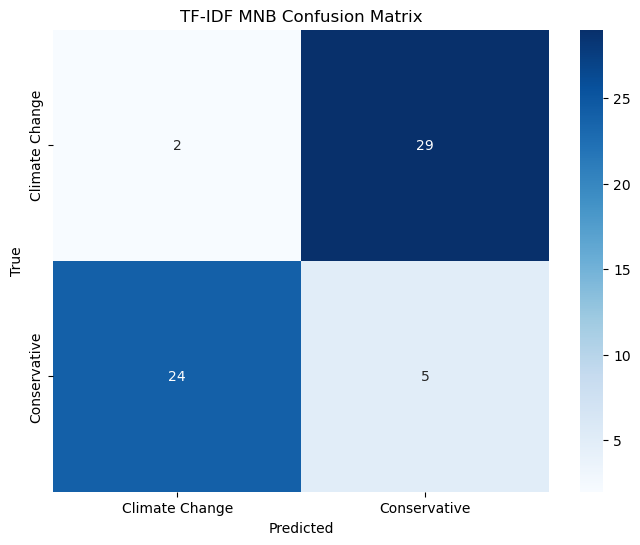

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_29013/194467680.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')


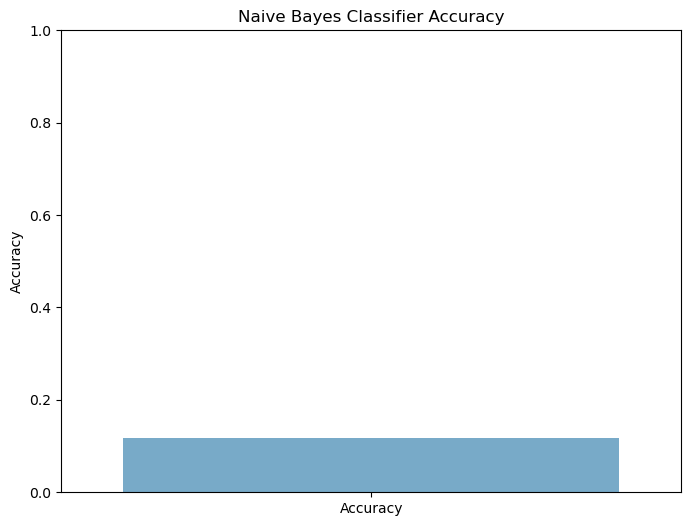

Top 50 features:
['able' 'abruptly' 'accelerating' 'according' 'account' 'accurate'
 'actually' 'adapt' 'affordable' 'age' 'agenda' 'agenda driven' 'ago'
 'ago times' 'agree' 'air' 'aren' 'arguing' 'article' 'atmosphere'
 'attempt' 'attention' 'average' 'bad' 'based' 'basic' 'basic physics'
 'believe' 'believe climate' 'believes' 'best' 'better' 'big' 'bigger'
 'biggest' 'billions' 'blow' 'blowing' 'brief' 'bullshit' 'burning'
 'business' 'buy' 'caps' 'car' 'case' 'cause' 'caused' 'celsius' 'change']


In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("data/climate_change_and_conservative_subreddit_comments.csv")

# Rebuild X using the original raw text data (assumed to be in `df['body']`)
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=1000,
    ngram_range=(1, 2),
    token_pattern=r'\b[a-zA-Z]{3,}\b',

)
X_tfidf = vectorizer.fit_transform(df['body'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB(
    alpha=1.0,  # Laplace smoothing parameter
    fit_prior=True,  # Whether to learn class prior probabilities
    class_prior=None  # Class prior probabilities (if not provided, they are learned from the data)
)
# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
# Plot the confusion matrix

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Climate Change', 'Conservative'], yticklabels=['Climate Change', 'Conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('TF-IDF MNB Confusion Matrix')
plt.show()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy')
plt.show()


print("Top 50 features:")
print(vectorizer.get_feature_names_out()[:50])
